<a href="https://colab.research.google.com/github/sytong12/SEEM3650project/blob/main/nanogpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
!git clone https://github.com/karpathy/nanoGPT

Cloning into 'nanoGPT'...
remote: Enumerating objects: 686, done.
remote: Total 686 (delta 0), reused 0 (delta 0), pack-reused 686 (from 1)
Receiving objects: 100% (686/686), 954.03 KiB | 2.87 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [ ]:
%cd /content/nanoGPT

/content/nanoGPT


In [ ]:
!pip install torch numpy transformers datasets tiktoken wandb tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip show torch numpy transformers datasets tiktoken wandb tqdm |grep Version

Version: 2.6.0+cu124
Version: 2.0.2
Version 3.1, 31 March 2009
                       Version 3, 29 June 2007
  5. Conveying Modified Source Versions.
  14. Revised Versions of this License.
Version: 4.51.3
Version: 3.5.1
Version: 0.9.0
Version: 0.19.10
Version: 4.67.1


#Training of model using shakespeare_char dataset

In [ ]:
!python data/shakespeare_char/prepare.py

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens


Training and sample using default settings

In [ ]:
!python train.py config/train_shakespeare_char.py --compile=False

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python sample.py --out_dir=out-shakespeare-char

Overriding: out_dir = out-shakespeare-char
number of parameters: 10.65M
Loading meta from data/shakespeare_char/meta.pkl...


AUTOLYCUS:
O, will you be straight.

MENENIUS:
Stirrd your gates?

CORIOLANUS:
You met?

MENENIUS:
Nay, no more not to be much:
If you find it out of much but soils, since I lay you,
I'll speak with her person of else no more.

AUFIDIUS:
I would have show'd your name.
Be patient o'er the world that
Would so what evil so you would have no precise of mine;
Which you have forgot a sign of sheet in all of person
The ground.

CORIOLANUS:
So it was a brace of the viil court:
A very ready change to th
---------------

Men pardon me, you shall have hanged to myself.

Lord:
We must danger than I have no world.

DUKE VINCENTIO:
Why, how now!

LUCIO:
That which shall be been lost to die?

LUCIO:
For he that might have breathed the nurse o' the chance
the side and entreaty of the bear
Of great-brother than the lumb and her sons
That this here senses, his head in posterity,


Modifications: Layers = 5, Heads ∈ {2, 3, 5, 7}

In [ ]:
!python train.py config/train_shakespeare_char.py --compile=False --log_interval=10 --n_layer=5 --n_head=2 --n_embd=128 --max_iters=3000 --lr_decay_iters=3000

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python train.py config/train_shakespeare_char.py --compile=False --log_interval=10 --n_layer=5 --n_head=3 --n_embd=129 --max_iters=3000 --lr_decay_iters=3000

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python train.py config/train_shakespeare_char.py --compile=False --log_interval=10 --n_layer=5 --n_head=5 --n_embd=130 --max_iters=3000 --lr_decay_iters=3000

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python train.py config/train_shakespeare_char.py --compile=False --log_interval=10 --n_layer=5 --n_head=7 --n_embd=133 --max_iters=3000 --lr_decay_iters=3000

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

output of performance comparison

In [ ]:
import os
os.makedirs('figures')

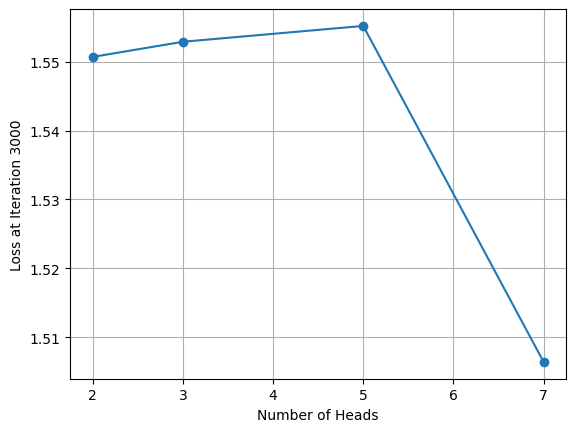

In [ ]:
import matplotlib.pyplot as plt
heads = [2, 3, 5, 7]
losses = [1.5507, 1.5529, 1.5552, 1.5064]
plt.plot(heads, losses, marker='o')
plt.xlabel('Number of Heads')
plt.ylabel('Loss at Iteration 3000')

plt.grid()
plt.savefig('figures/loss_changes.png')
plt.show()


#Training BabyGPT for Code Generation

In [ ]:
#create new dataset for data/code generation
!cp -r data/shakespeare_char data/code_generation
!wget https://raw.githubusercontent.com/karpathy/llama2.c/refs/heads/master/run.c -O data/code_generation/input.txt
!wget -O - https://raw.githubusercontent.com/karpathy/llama2.c/refs/heads/master/runq.c >> data/code_generation/input.txt
!wget -O - https://raw.githubusercontent.com/karpathy/llama2.c/refs/heads/master/test.c >> data/code_generation/input.txt
!wget -O - https://raw.githubusercontent.com/karpathy/llama2.c/refs/heads/master/win.c >> data/code_generation/input.txt
!wget -O - https://raw.githubusercontent.com/karpathy/llm.c/refs/heads/master/test_gpt2.c >> data/code_generation/input.txt
!wget -O - https://raw.githubusercontent.com/karpathy/llm.c/refs/heads/master/train_gpt2.c >> data/code_generation/input.txt

--2025-05-01 06:59:29--  https://raw.githubusercontent.com/karpathy/llama2.c/refs/heads/master/run.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38545 (38K) [text/plain]
Saving to: ‘data/code_generation/input.txt’

data/code_generatio 100%[===================>]  37.64K  --.-KB/s    in 0.005s  

2025-05-01 06:59:29 (6.76 MB/s) - ‘data/code_generation/input.txt’ saved [38545/38545]

--2025-05-01 06:59:29--  https://raw.githubusercontent.com/karpathy/llama2.c/refs/heads/master/runq.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [ ]:
!python data/code_generation/prepare.py

length of dataset in characters: 148,266
all the unique characters: 	
 !"#%&'()*+,-./0123456789:;<=>?@ABCDEFGHIKLMNOPQRSTUVWXY[\]^_`abcdefghijklmnopqrstuvwxyz{|}~éσ↔
vocab size: 97
train has 133,439 tokens
val has 14,827 tokens


In [ ]:
#create new config file
!cp -r config/train_shakespeare_char.py config/train_code_generation.py
!sed -i "s/out_dir = 'out-shakespeare-char'/out_dir = 'out-code-generation'/" config/train_code_generation.py
!sed -i "s/dataset = 'shakespeare_char'/dataset = 'code_generation'/" config/train_code_generation.py

In [ ]:
#training data/code generation model
!python train.py config/train_code_generation.py --compile=False

Overriding config with config/train_code_generation.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-code-generation'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'code_generation'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of tok

In [ ]:
#generates sample to file out-code-generation
!python sample.py --out_dir=out-code-generation

Overriding: out_dir = out-code-generation
number of parameters: 10.66M
Loading meta from data/code_generation/meta.pkl...

        if (text[0] != '\0') {
                 }
          }

     // read in continuation byte, so we've read not writa preatuve preature (byte", byte_val b.sstr_buffer.cannn_layers
            max_i = -10000000;
             for (int i = 0; i < head_size; i++) {
                   float val = probs_bt[i] - index[i];
                  float val +== ix * (probs_bt[i] - max_val);
                     float val = 0.0f + pos * frob + i * n;
                   float val = 0.0f;
                  fl
---------------

                                                                                                                  int B, int T, int OC, int C) {
             for (int o = 0; o < OC; i++) {
                                     float val = 0.0f;
                     float val = 0.0f + val * (in + i * C) * weight[o + b * C + t * OC;
          }
            }

